In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors

In [3]:
from wordcloud import WordCloud,ImageColorGenerator
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [4]:
 pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pywaffle import Waffle

In [6]:
df = pd.read_csv("./Desktop/Archive/country_vaccinations.csv")


In [7]:
new_df = df.groupby(["country",'iso_code','vaccines'])['total_vaccinations',
                     'people_vaccinated','people_fully_vaccinated',
                    'daily_vaccinations','total_vaccinations_per_hundred',
                    'people_vaccinated_per_hundred',"people_fully_vaccinated_per_hundred"
,'daily_vaccinations_per_million'].max().reset_index()

In [8]:
top10 = new_df['vaccines'].value_counts().nlargest(10)
top10

Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech        24
Oxford/AstraZeneca                                                   23
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         15
Oxford/AstraZeneca, Pfizer/BioNTech                                  10
Moderna, Pfizer/BioNTech                                              8
Johnson&Johnson, Oxford/AstraZeneca, Sinopharm/Beijing                7
Pfizer/BioNTech                                                       7
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V     6
Oxford/AstraZeneca, Sinopharm/Beijing                                 5
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing                5
Name: vaccines, dtype: int64

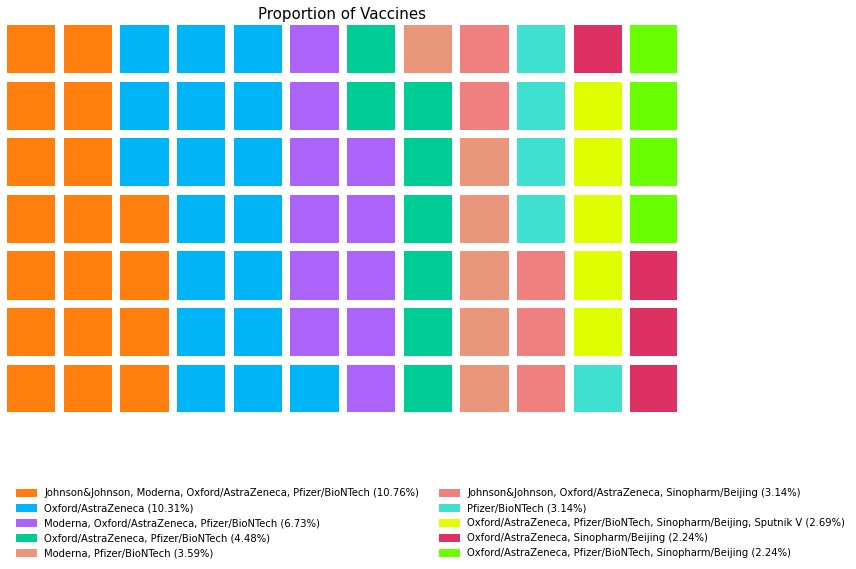

In [9]:
data = dict(new_df['vaccines'].value_counts(normalize = True).nlargest(10)*100)                                  #dict(new_df['vaccines'].value_counts(normalize = True) * 100)
vaccine = ['Oxford/AstraZeneca', 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Sinopharm/Beijing', 'Moderna, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac'] 
fig = plt.figure( 
    rows=7,
    columns=12,
    FigureClass = Waffle, 
    values = data, 
    title={'label': 'Proportion of Vaccines', 'loc': 'center',
          'fontsize':15},
    colors=("#FF7F0E", "#00B5F7", "#AB63FA","#00CC96","#E9967A","#F08080","#40E0D0","#DFFF00","#DE3163","#6AFF00"),
    labels=[f"{k} ({v:.2f}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 2, 'framealpha': 0},
    figsize=(12, 9)
)
fig.show()

In [10]:
data = new_df[['country','total_vaccinations']].nlargest(25,'total_vaccinations')
fig = px.bar(data, x = 'country',y = 'total_vaccinations',title="Number of total vaccinations according to countries",)
fig.show()

In [11]:
data = new_df[['country','daily_vaccinations']].nlargest(25,'daily_vaccinations')
fig = px.bar(data, x = 'country',y = 'daily_vaccinations',title="Number of daily vaccinations according to countries",)
fig.show()

In [12]:
vacc = new_df["vaccines"].unique()
for i in vacc:
    c = list(new_df[new_df["vaccines"] == i]['country'])
    print(f"Vaccine: {i}nUsed countries: {c}")

Vaccine: Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/BeijingnUsed countries: ['Afghanistan', 'Belize', 'Cameroon', 'Namibia', 'Trinidad and Tobago']
Vaccine: Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik VnUsed countries: ['Albania', 'Azerbaijan', 'Bosnia and Herzegovina', 'Oman']
Vaccine: Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik VnUsed countries: ['Algeria', 'Zimbabwe']
Vaccine: Moderna, Oxford/AstraZeneca, Pfizer/BioNTechnUsed countries: ['Andorra', 'Australia', 'Canada', 'England', 'Finland', 'Guernsey', 'Isle of Man', 'Japan', 'Jersey', 'Northern Ireland', 'Scotland', 'Sint Maarten (Dutch part)', 'Sweden', 'United Kingdom', 'Wales']
Vaccine: Oxford/AstraZenecanUsed countries: ['Angola', 'Democratic Republic of Congo', 'Ethiopia', 'Falkland Islands', 'Fiji', 'Kiribati', 'Liberia', 'Mali', 'Montserrat', 'Nauru', 'Nigeria', 'Niue', 'Papua New Guinea', 'Pitcairn', 'Saint Helena', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Princ

In [13]:
fig = px.choropleth(new_df,locations = 'country',locationmode = 'country names',color = 'vaccines',
                   title = 'Vaccines used by specefic Country',hover_data= ['total_vaccinations'])
fig.show()

In [14]:
vaccine = new_df["vaccines"].value_counts().reset_index()
vaccine.columns = ['Vaccines','Number of Country']
vaccine.nlargest(5,"Number of Country")

,Vaccines,Number of Country
0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",24
1,Oxford/AstraZeneca,23
2,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",15
3,"Oxford/AstraZeneca, Pfizer/BioNTech",10
4,"Moderna, Pfizer/BioNTech",8


In [15]:
fig = px.treemap(new_df,names = 'country',values = 'total_vaccinations',
                 path = ['vaccines','country'],
                 title="Total Vaccinations per country grouped by Vaccines",
                 color_discrete_sequence =px.colors.qualitative.Set1)
fig.show()

In [16]:
fig = go.Choropleth(locations = new_df["country"],locationmode = 'country names',
                    z = new_df['total_vaccinations'],
                    text= new_df['country'],colorbar = dict(title= "Total Vaccinations"))
data = [fig]
layout = go.Layout(title = 'Total Vaccinations per Country')
fig = dict(data = data,layout = layout)
iplot(fig)


In [17]:
fig = go.Choropleth(locations = new_df["country"],locationmode = 'country names',
                    z = new_df['daily_vaccinations'],
                    text= new_df['country'],colorbar = dict(title= "Daily Vaccinations"))
data = [fig]
layout = go.Layout(title = 'Daily Vaccinations per Countries')
fig = dict(data = data,layout = layout)
iplot(fig)

In [18]:
fig = px.scatter(new_df,x = 'total_vaccinations',y='total_vaccinations_per_hundred',
                 size='total_vaccinations',
                 hover_name = 'country',size_max = 50,
                 title="Total vs Total vaccinations per hundred grouped by Vaccines",
                color_discrete_sequence = px.colors.qualitative.Bold)
fig.show()